In [1]:
using Random, Distributions, HypothesisTests, Plots; pyplot()

Plots.PyPlotBackend()

In [2]:
muRange = 51:0.02:55
n = 20
N = 10^4
mu0 = 53.0
powerT, powerU = [], []

(Any[], Any[])

In [3]:
for muActual in muRange
    dist = Normal(muActual, 1.2)
    rejectT, rejectU = 0, 0
    Random.seed!(1)
    for _ in 1:N
        data = rand(dist,n)
        xBar, stdDev = mean(data), std(data)
        tStatT = (xBar - mu0)/(stdDev/sqrt(n))
        pValT = 2*ccdf(TDist(n-1), abs(tStatT))
        xPositive = sum(data .> mu0)
        uStat = max(xPositive, n-xPositive)
        pValSign = 2*pdf(Binomial(n,0.5), uStat)
        rejectT += pValT < 0.05
        rejectU += pValSign < 0.05
    end
    push!(powerT, rejectT/N)
    push!(powerU, rejectU/N)
end

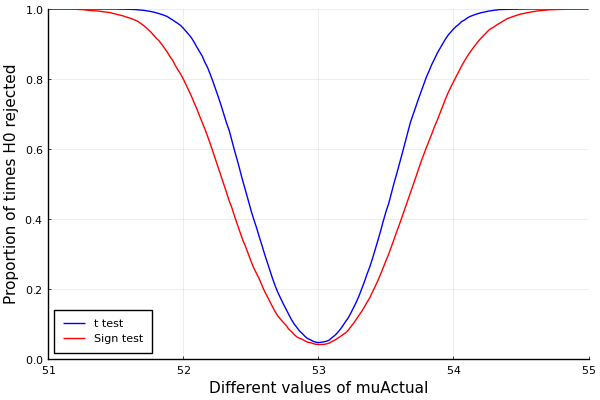

In [4]:
plot(muRange, powerT, c=:blue, label="t test")
plot!(muRange, powerU, c=:red, label="Sign test",
xlims=(51,55), ylims=(0,1),
xlabel="Different values of muActual",
ylabel="Proportion of times H0 rejected", legend=:bottomleft)